In [10]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#### Data Collection

In [2]:
data = load_wine(as_frame=True)
data.frame.head() # Consists of 13 numerical features and 3 output types

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit it to the train data
scaler.fit(X_train)

# Use it to transform the train and test data
X_train = scaler.transform(X_train)

# Notice that the scaler is trained on the train data to avoid data leakage from the test set
X_test = scaler.transform(X_test)

#### Create Random Forest Model

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Fit the classifier
rf_clf = RandomForestClassifier(n_estimators=10, random_state=42).fit(X_train, y_train)

# Print the mean accuracy achieved by the classifier on the test set
rf_clf.score(X_test, y_test)

0.9111111111111111

#### Feature Importance based
- Built in method
- If a feature is capable of creating pure splits in the tree and contributes to a cleaner partitioning of the data, that feature will have a higher importance
- Applied on training data, do not reflect the ability of feature to be useful to make preidctions that generalizes to test set
- Computed as the mean and standard deviation of accumulation of the impurtiy decrease within each tree
- Can be misleading for high cardinality features (many unique vlaues), higher bias towards features with more categories

<Axes: >

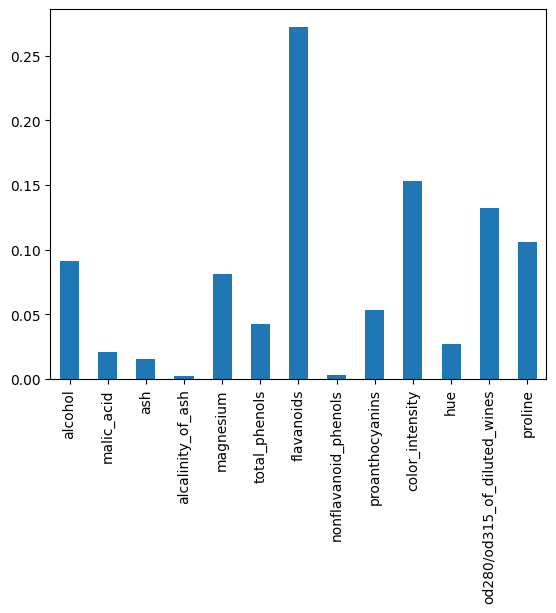

In [16]:
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=data.feature_names)
forest_importances.plot.bar()

#### Feature Permutation
- Overcomes the limitations of impurity based feature importance, do not have a bias toward high cardinality features
- Is more agnostic
- It assesses how a feature affects the model’s predictive performance, involves a randomly shuffling values of a single feature and then measure the reduction in model performance criterion
- Applied on test data

In [7]:
from sklearn.inspection import permutation_importance

def feature_importance(clf, X, y, top_limit=None):

  # Retrieve the Bunch object after 50 repeats
  # n_repeats is the number of times that each feature was permuted to compute the final score
  bunch = permutation_importance(clf, X, y,
                                 n_repeats=50, random_state=42)

  # Average feature importance
  imp_means = bunch.importances_mean

  # List that contains the index of each feature in descending order of importance
  ordered_imp_means_args = np.argsort(imp_means)[::-1]

  # If no limit print all features
  if top_limit is None:
    top_limit = len(ordered_imp_means_args)

  # Print relevant information
  for i, _ in zip(ordered_imp_means_args, range(top_limit)):
    name = data.feature_names[i]
    imp_score = imp_means[i]
    imp_std = bunch.importances_std[i]
    print(f"Feature {name} with index {i} has an average importance score of {imp_score:.3f} +/- {imp_std:.3f}\n")

In [8]:
# For training set
feature_importance(rf_clf, X_train, y_train)

Feature flavanoids with index 6 has an average importance score of 0.227 +/- 0.025

Feature proline with index 12 has an average importance score of 0.142 +/- 0.019

Feature color_intensity with index 9 has an average importance score of 0.112 +/- 0.023

Feature od280/od315_of_diluted_wines with index 11 has an average importance score of 0.007 +/- 0.005

Feature total_phenols with index 5 has an average importance score of 0.003 +/- 0.004

Feature malic_acid with index 1 has an average importance score of 0.002 +/- 0.004

Feature proanthocyanins with index 8 has an average importance score of 0.002 +/- 0.003

Feature hue with index 10 has an average importance score of 0.002 +/- 0.003

Feature nonflavanoid_phenols with index 7 has an average importance score of 0.000 +/- 0.000

Feature magnesium with index 4 has an average importance score of 0.000 +/- 0.000

Feature alcalinity_of_ash with index 3 has an average importance score of 0.000 +/- 0.000

Feature ash with index 2 has an aver

In [18]:
# For test set
feature_importance(rf_clf, X_test, y_test)

Feature flavanoids with index 6 has an average importance score of 0.202 +/- 0.047

Feature proline with index 12 has an average importance score of 0.143 +/- 0.042

Feature color_intensity with index 9 has an average importance score of 0.112 +/- 0.043

Feature alcohol with index 0 has an average importance score of 0.024 +/- 0.017

Feature magnesium with index 4 has an average importance score of 0.021 +/- 0.015

Feature od280/od315_of_diluted_wines with index 11 has an average importance score of 0.015 +/- 0.018

Feature hue with index 10 has an average importance score of 0.013 +/- 0.018

Feature total_phenols with index 5 has an average importance score of 0.002 +/- 0.016

Feature nonflavanoid_phenols with index 7 has an average importance score of 0.000 +/- 0.000

Feature alcalinity_of_ash with index 3 has an average importance score of 0.000 +/- 0.000

Feature malic_acid with index 1 has an average importance score of -0.002 +/- 0.017

Feature ash with index 2 has an average imp

##### Outcome/ Findings
- Looks like many of the features have a fairly low importance score
- This points that the predictive power of this dataset is conmdensed in a few features
- The top most important features are the same for both sets
- However features such as **alcohol**, which was considered not important for the training set is much more important when using the testing set
- This hints that this feature will contribute to the generalization power of the model
- **If a feature is deemed as important for the train set but not for the testing, this feature will probably cause the model to overfit.**

#### Retrain with top N features

In [21]:
# Preserve only the top 3 features
X_train_top_features = X_train[:,[6, 9, 12]]
X_test_top_features = X_test[:,[6, 9, 12]]

# Re-train with only these features
rf_clf_top = RandomForestClassifier(n_estimators=10, random_state=42).fit(X_train_top_features, y_train)

# Compute mean accuracy achieved
rf_clf_top.score(X_test_top_features, y_test) # Higher score compared to all 13 features

0.9333333333333333

In [23]:
# Add in **alcohol** feature
# Preserve only the top 3 features
X_train_top_features = X_train[:,[0, 6, 9, 12]]
X_test_top_features = X_test[:,[0, 6, 9, 12]]

# Re-train with only these features
rf_clf_top = RandomForestClassifier(n_estimators=10, random_state=42).fit(X_train_top_features, y_train)

# Compute mean accuracy achieved
rf_clf_top.score(X_test_top_features, y_test)

1.0

#### Other Classifiers

In [25]:
from sklearn.svm import SVC
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier

clfs = {
    "Laso": Lasso(alpha=0.05), # forces to 0, encouraging sparsity in model, removing less important predictors, add penalty term to the least suqares obj function (sum of absolute values * alpha)
    "Ridge": Ridge(), # shrik towards 0, penalty term to least suqares objecive functions, both effective in dealing with multicolinearity
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector": SVC()
}


In [28]:
def fit_compute_importance(clf):
  clf.fit(X_train, y_train)
  print(f"Mean accuracy score on the test set: {clf.score(X_test, y_test)*100:.2f}%\n")
  print("Top 4 features when using the test set:\n")
  feature_importance(clf, X_test, y_test, top_limit=4)

In [29]:
for name, clf in clfs.items():
  print("====="*20)
  print(f"➡️ {name} classifier\n")
  fit_compute_importance(clf)

➡️ Laso classifier

Mean accuracy score on the test set: 86.80%

Top 4 features when using the test set:

Feature flavanoids with index 6 has an average importance score of 0.323 +/- 0.055

Feature proline with index 12 has an average importance score of 0.203 +/- 0.035

Feature od280/od315_of_diluted_wines with index 11 has an average importance score of 0.146 +/- 0.030

Feature alcalinity_of_ash with index 3 has an average importance score of 0.038 +/- 0.014

➡️ Ridge classifier

Mean accuracy score on the test set: 88.71%

Top 4 features when using the test set:

Feature flavanoids with index 6 has an average importance score of 0.445 +/- 0.071

Feature proline with index 12 has an average importance score of 0.210 +/- 0.035

Feature color_intensity with index 9 has an average importance score of 0.119 +/- 0.029

Feature od280/od315_of_diluted_wines with index 11 has an average importance score of 0.111 +/- 0.026

➡️ Decision Tree classifier

Mean accuracy score on the test set: 95.